In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
img1 = cv2.imread('disparity-1.png')
img2 = cv2.imread('disparity-2.png')

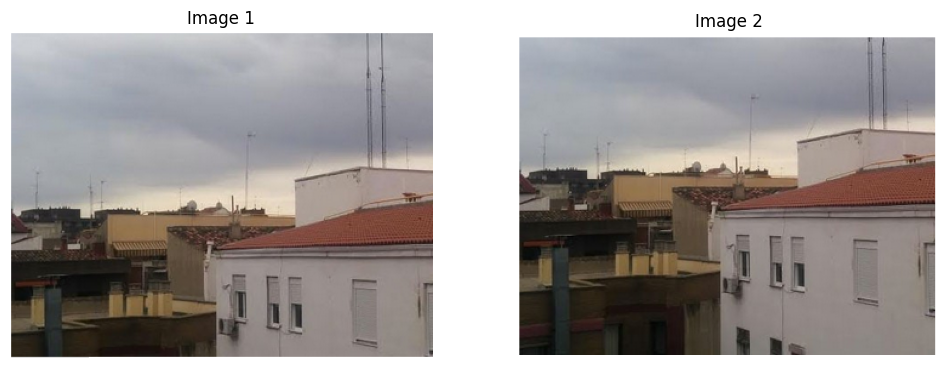

In [3]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')
plt.show()


In [4]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


In [5]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)


In [6]:
points1 = np.float32([kp1[m.queryIdx].pt for m in matches])
points2 = np.float32([kp2[m.trainIdx].pt for m in matches])


In [7]:
F, mask = cv2.findFundamentalMat(points1, points2, method=cv2.FM_RANSAC)


In [8]:
points1 = points1[mask.ravel() == 1]
points2 = points2[mask.ravel() == 1]


In [9]:
focal_length = 800  
center = (img1.shape[1] / 2, img1.shape[0] / 2)

K = np.array([[focal_length, 0, center[0]],
              [0, focal_length, center[1]],
              [0, 0, 1]])


In [10]:
t = np.array([0, 0, 0])  
R = np.eye(3)  
P1 = K @ np.hstack((R, t.reshape(-1, 1)))  
t1 = np.array([0, 0, 0])  
t2 = np.array([0, 0, 5])  
P2 = K @ np.hstack((R, t2.reshape(-1, 1)))  
points_4d_hom = cv2.triangulatePoints(P1, P2, points1.T, points2.T)
points_3d = points_4d_hom[:3] / points_4d_hom[3] 

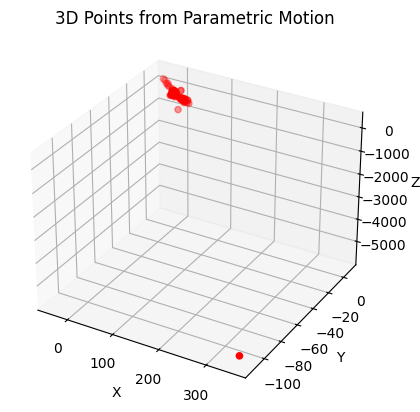

3D Points:
 [[ 1.00210774e+00  1.56243229e+00  1.50065060e+01]
 [ 2.52660828e+01 -4.40032065e-01 -1.85666733e+02]
 [ 1.94363613e+01 -1.42753199e-01 -1.49811737e+02]
 [ 2.61934357e+01 -1.64424345e-01 -1.84471313e+02]
 [-7.88311511e-02 -2.76342947e-02 -5.84478283e+00]
 [-1.22813784e-01 -2.06881221e-02 -6.85507154e+00]
 [ 1.90188646e-01 -1.12566827e-02 -8.22672176e+00]
 [ 6.93966895e-02 -2.98868120e-02 -5.51720524e+00]
 [-1.84858609e-02 -2.03417242e-02 -4.63294125e+00]
 [ 4.51444179e-01  4.09781747e-02 -1.22200642e+01]
 [-6.98765934e-01 -2.33192071e-02 -1.63010559e+01]
 [-7.36875273e-03 -3.88483070e-02 -3.76525140e+00]
 [-3.90635633e+00  2.81720901e+00  3.14721813e+01]
 [-7.00994879e-02  1.38385907e-01  2.88053775e+00]
 [ 1.23105841e-02 -3.66532356e-02 -3.91495275e+00]
 [ 1.95921764e-01  8.07192504e-01  8.20553493e+00]
 [-1.23169029e+00  5.16443491e-01 -1.85864925e+01]
 [-1.42971623e+00  1.39890060e-01 -2.33556442e+01]
 [-6.65831923e-01  1.06657399e-02 -1.56509056e+01]
 [ 5.98372519e-03 -

In [11]:

# Step 11: Visualize 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points_3d[0], points_3d[1], points_3d[2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D Points from Parametric Motion')
plt.show()

# Print optimized 3D points
print("3D Points:\n", points_3d.T)
